Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
Limpeza e tratamento de dados

In [ ]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [ ]:
#importar dados
dataset = pd.read_csv("tempo.csv", sep=";")
#visulizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [ ]:
#explorar dados categoricos
#aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

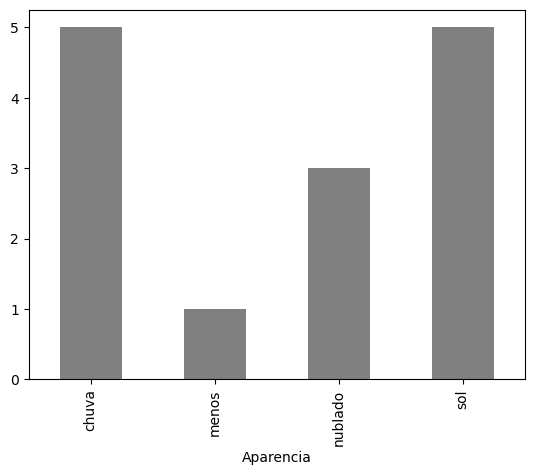

In [ ]:
agrupado.plot.bar(color = 'gray')

In [ ]:
#aparencia
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

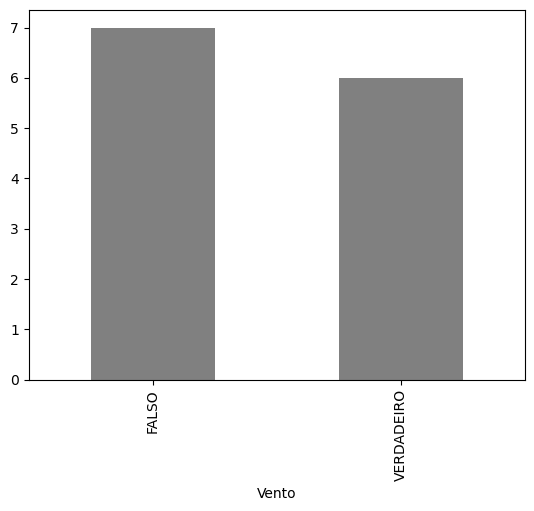

In [ ]:
agrupado.plot.bar(color = 'gray')

In [ ]:
#jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

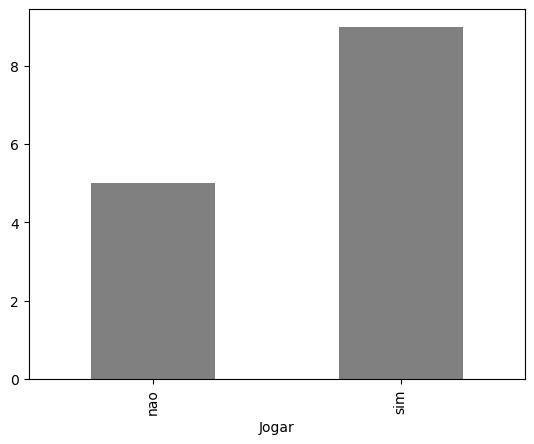

In [ ]:
agrupado.plot.bar(color = 'gray')

In [ ]:
#explorar colunas numéricas
#temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

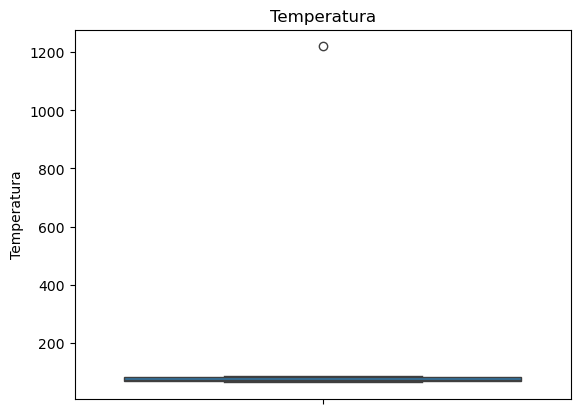

In [ ]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

C:\Users\gkevy\AppData\Local\Temp\ipykernel_2788\1502053818.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Temperatura']).set_title('Temperatura')


Text(0.5, 1.0, 'Temperatura')

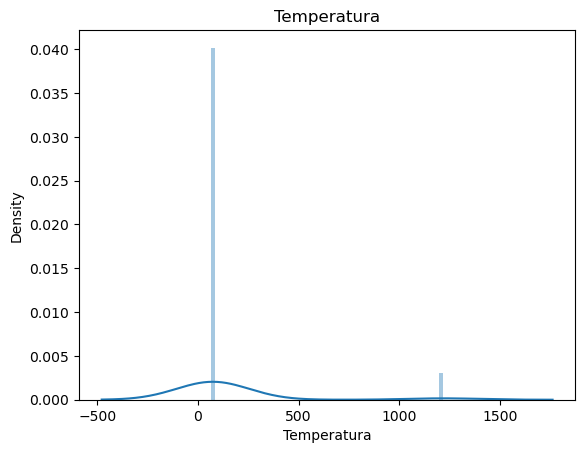

In [ ]:
srn.distplot(dataset['Temperatura']).set_title('Temperatura')

In [ ]:
#Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

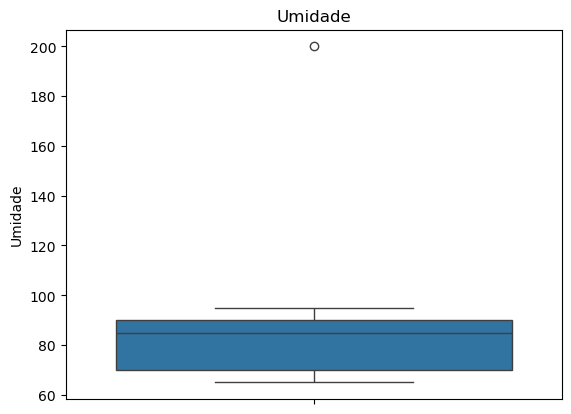

In [ ]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

C:\Users\gkevy\AppData\Local\Temp\ipykernel_2788\640715104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Umidade']).set_title('Umidade')


Text(0.5, 1.0, 'Umidade')

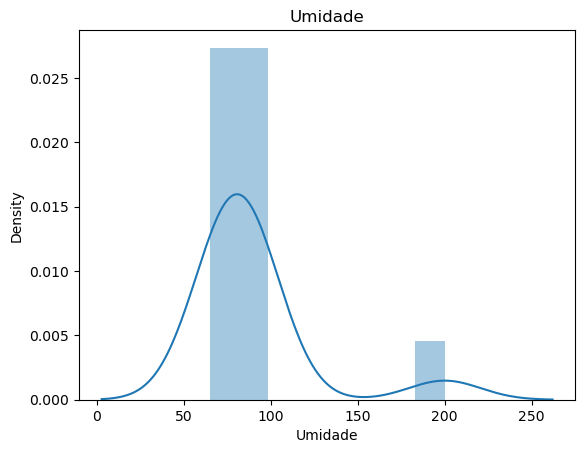

In [ ]:
srn.distplot(dataset['Umidade']).set_title('Umidade')

In [ ]:
#contamos valores NAN
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [ ]:
#aparencia valor invalido
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [ ]:
dataset.loc[dataset['Aparencia'] ==  'menos', 'Aparencia'] = "Sol"
#visualiza o resultado
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
Sol        1
chuva      5
nublado    3
sol        5
dtype: int64

In [ ]:
#temperatura fora do dominio
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [ ]:
#visualizar 
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [ ]:
#calular a mediana
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [ ]:
#substituir
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130), 'Temperatura'] = mediana

C:\Users\gkevy\AppData\Local\Temp\ipykernel_2788\573847611.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130), 'Temperatura'] = mediana


In [ ]:
#verificamos se ainda existem #verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
#umidade, dominio e NAs
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [ ]:
#total de Nas
dataset['Umidade'].isnull().sum()

np.int64(1)

In [ ]:
#calular a mediana
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [ ]:
#preenche NAs
dataset['Umidade'].fillna(mediana, inplace=True)

C:\Users\gkevy\AppData\Local\Temp\ipykernel_2788\2529795605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Umidade'].fillna(mediana, inplace=True)


In [ ]:
dataset['Umidade'].isnull().sum()

np.int64(0)

In [ ]:
#visuliza de acordo com o dominio de acordo com o dominio
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [ ]:
#atualiza comm mediana
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade'] = mediana

In [ ]:
#visuliza novamente
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
#Vemtos
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [ ]:
#total de Nas
dataset['Vento'].isnull().sum()

np.int64(1)

In [ ]:
#preenche NAs
dataset['Vento'].fillna('FALSO', inplace=True)

C:\Users\gkevy\AppData\Local\Temp\ipykernel_2788\3014049018.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Vento'].fillna('FALSO', inplace=True)


In [ ]:
#total de Nas
dataset['Vento'].isnull().sum()

np.int64(0)